# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [7]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

x_train = trainX / 255
x_test = testX / 255

y_train_cat = keras.utils.to_categorical(trainy, 10)
y_test_cat = keras.utils.to_categorical(testy, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
 
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


## 1.3. Визуализируем часть данных из датасета

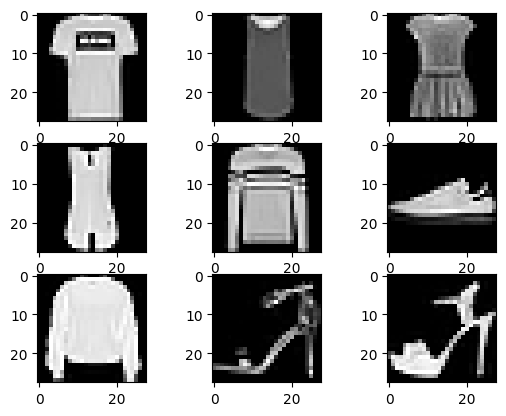

In [4]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [5]:
model_1 = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

## 1.5. Обучаем модель

In [6]:
EPOCH = 3

model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model_1.fit(x_train, y_train_cat, batch_size=64, epochs=EPOCH, validation_split=0.2)

model_1.evaluate(x_test, y_test_cat)

Epoch 1/3
750/750 [==============================] - 31s 40ms/step - loss: 0.5062 - accuracy: 0.8157 - val_loss: 0.4327 - val_accuracy: 0.8439
Epoch 2/3
750/750 [==============================] - 28s 37ms/step - loss: 0.3153 - accuracy: 0.8861 - val_loss: 0.3175 - val_accuracy: 0.8855
Epoch 3/3
313/313 [==============================] - 2s 7ms/step - loss: 0.3252 - accuracy: 0.8753


[0.3252263069152832, 0.8752999901771545]

## 1.5. Анализируем обученную модель. Строим график (графики) обучения

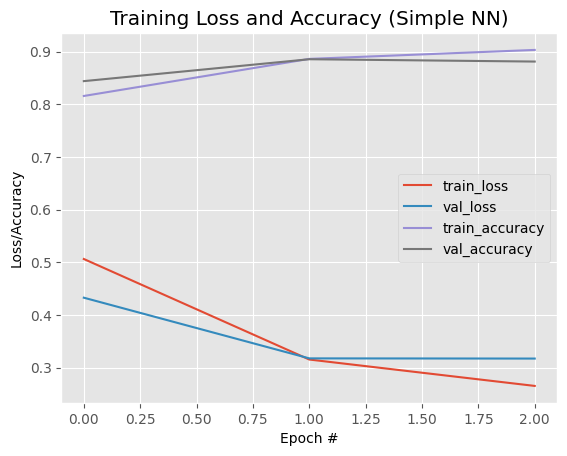

In [7]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [8]:
import cv2

def predmnist(uploaded):
    image = uploaded
    image = cv2.resize(uploaded, (28, 28)) # Изменение разрешения изображения
    image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
    image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
    preds = model_1.predict(image)
    print(preds)
    i = preds.argmax(axis=1)[0]
    j = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print(f"Вы загрузили изображение из категории:", j[i])  

In [10]:
uploaded_1 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/sandal.jpg', cv2.IMREAD_GRAYSCALE)
predmnist(uploaded_1)
uploaded_2 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/bag.jpg', cv2.IMREAD_GRAYSCALE)
predmnist(uploaded_2)
uploaded_3 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/coat.jpg', cv2.IMREAD_GRAYSCALE)
predmnist(uploaded_3)
uploaded_4 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/shirt.jpg', cv2.IMREAD_GRAYSCALE)
predmnist(uploaded_4)
uploaded_5 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/dress.jpg', cv2.IMREAD_GRAYSCALE)
predmnist(uploaded_5)

1/1 [==============================] - 0s 179ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Вы загрузили изображение из категории: Sandal
1/1 [==============================] - 0s 35ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Вы загрузили изображение из категории: Bag
1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Вы загрузили изображение из категории: Shirt
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Вы загрузили изображение из категории: Coat
1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Вы загрузили изображение из категории: Dress


Вывод: сеть перепутала куртку и рубашку.

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [9]:
from imutils import paths
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import Adam
import cv2

In [39]:
labels = []
data =[]

In [40]:
images = sorted(list(paths.list_images("C:/Users/HUAWEI/OneDrive/Desktop/Crowler/")))

In [41]:
for image in images:
	
	image_new = cv2.imread(image) # загружаем изображение
	try:
		image_new = (cv2.resize(image_new, (64, 64))) # меняем его разрешение на 64x64 пикселей (без учета соотношения сторон),																									# сглаживаем его в 32x32x3=3072 пикселей
		label = image.replace("\\", "/").split("/")[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
		labels.append(label) # обновляем список меток
		data.append(image_new) # добавляем в список
	except Exception as e:
		pass

In [42]:
random.shuffle(images)

In [43]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

data[0].shape

(64, 64, 3)

In [44]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [45]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (1536, 64, 64, 3)
Test: X =  (513, 64, 64, 3)


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


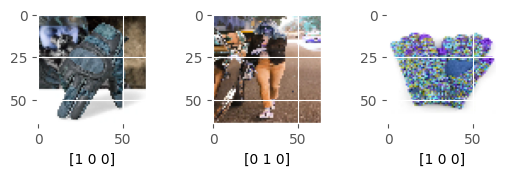

In [46]:
for i in range(1, 4):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i])
    plt.xlabel(trainY[i])
 
plt.show()

In [47]:
model_2 = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3,  activation='softmax')
])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)       

In [48]:
EPOCH = 30
opt = Adam(learning_rate = 0.000015)


model_2.compile(optimizer = opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model_2.fit(trainX, trainY, batch_size=512, epochs=EPOCH, verbose=1, validation_data=(testX,testY))

Epoch 1/30
3/3 [==============================] - 5s 2s/step - loss: 1.0968 - accuracy: 0.3203 - val_loss: 1.0948 - val_accuracy: 0.3509
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 1.0925 - accuracy: 0.3978 - val_loss: 1.0924 - val_accuracy: 0.4464
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 1.0897 - accuracy: 0.4746 - val_loss: 1.0902 - val_accuracy: 0.4756
Epoch 4/30
3/3 [==============================] - 4s 2s/step - loss: 1.0871 - accuracy: 0.4948 - val_loss: 1.0878 - val_accuracy: 0.4873
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 1.0846 - accuracy: 0.4961 - val_loss: 1.0859 - val_accuracy: 0.4834
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 1.0817 - accuracy: 0.5085 - val_loss: 1.0840 - val_accuracy: 0.4971
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 1.0793 - accuracy: 0.5286 - val_loss: 1.0823 - val_accuracy: 0.4971
Epoch 8/30
3/3 [=========================

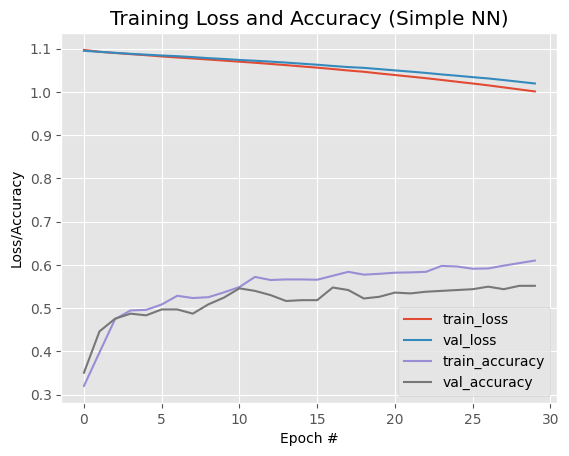

In [50]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

"Вдохновилась" архитектурой AlexNet

In [72]:
labels = []
data =[]

images = sorted(list(paths.list_images("C:/Users/HUAWEI/OneDrive/Desktop/Crowler/")))
for image in images:
	
	image_new = cv2.imread(image) # загружаем изображение
	try:
		image_new = (cv2.resize(image_new, (64, 64))) # меняем его разрешение на 64x64 пикселей (без учета соотношения сторон),																									# сглаживаем его в 32x32x3=3072 пикселей
		label = image.replace("\\", "/").split("/")[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
		labels.append(label) # обновляем список меток
		data.append(image_new) # добавляем в список
	except Exception as e:
		pass
	
random.shuffle(images)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

data[0].shape
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (1536, 64, 64, 3)
Test: X =  (513, 64, 64, 3)


In [75]:
model_3 = keras.Sequential([
    Conv2D(filters=32, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(64, 64, 3)),
    # MaxPooling2D(pool_size=(3, 3), strides= (2, 2)),
    # Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"),
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides= (2, 2)),
    #Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(3,  activation='softmax')])

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        11648     
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 256)       73984     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 6, 128)         295040    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 512)              

In [76]:
EPOCH = 70
opt = Adam(learning_rate = 0.00001)


model_3.compile(optimizer = opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model_3.fit(trainX, trainY, batch_size=512, epochs=EPOCH, verbose=1, validation_data=(testX,testY))

Epoch 1/70
3/3 [==============================] - 3s 778ms/step - loss: 1.0990 - accuracy: 0.3418 - val_loss: 1.0990 - val_accuracy: 0.3450
Epoch 2/70
3/3 [==============================] - 2s 662ms/step - loss: 1.0988 - accuracy: 0.3503 - val_loss: 1.0982 - val_accuracy: 0.3411
Epoch 3/70
3/3 [==============================] - 2s 737ms/step - loss: 1.0993 - accuracy: 0.3281 - val_loss: 1.0974 - val_accuracy: 0.3743
Epoch 4/70
3/3 [==============================] - 2s 631ms/step - loss: 1.0983 - accuracy: 0.3418 - val_loss: 1.0966 - val_accuracy: 0.4055
Epoch 5/70
3/3 [==============================] - 2s 597ms/step - loss: 1.0968 - accuracy: 0.3509 - val_loss: 1.0959 - val_accuracy: 0.4230
Epoch 6/70
3/3 [==============================] - 2s 702ms/step - loss: 1.0964 - accuracy: 0.3594 - val_loss: 1.0952 - val_accuracy: 0.4269
Epoch 7/70
3/3 [==============================] - 2s 655ms/step - loss: 1.0948 - accuracy: 0.3652 - val_loss: 1.0945 - val_accuracy: 0.4386
Epoch 8/70
3/3 [====

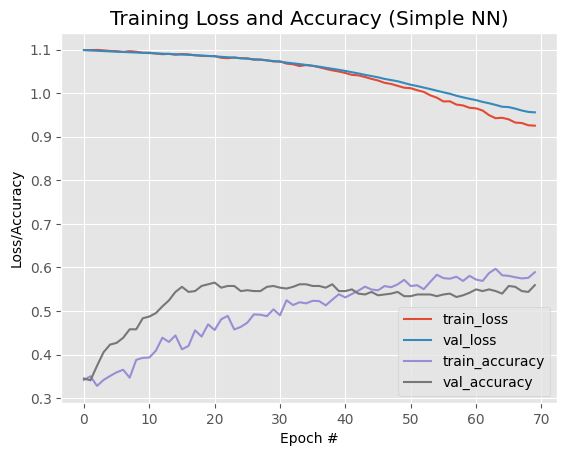

In [77]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.3. Сохраните полученные модели

In [80]:
model_2.save("C:/Users/HUAWEI/OneDrive/Desktop/model_2.h5", save_format="h5")
model_3.save("C:/Users/HUAWEI/OneDrive/Desktop/model_3.h5", save_format="h5")

## 2.4. Загрузите обученную модель из прошлой практической работы


In [11]:
from keras import models
import cv2
import os
import random

In [12]:
model = models.load_model("model.h5")
model_2 = models.load_model("model_2.h5")
model_3 = models.load_model("model_3.h5")

In [13]:
def img(pred):
    img_1 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks1.jpg')
    pred(img_1)
    img_2 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks2.jpg')
    pred(img_2)
    img_3 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks3.jpg')
    pred(img_3)
    img_4 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks4.jpg')
    pred(img_4)
    img_5 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks5.jpg')
    pred(img_5)
    img_6 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves1.jpg')
    pred(img_6)
    img_7 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves2.jpg')
    pred(img_7)
    img_8 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves3.jpg')
    pred(img_8)
    img_9 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves4.jpg')
    pred(img_9)
    img_10 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves5.jpg')
    pred(img_10)
    img_11 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans1.jpg')
    pred(img_11)
    img_12 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans2.jpg')
    pred(img_12)
    img_13 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans3.jpg')
    pred(img_13)
    img_14 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans4.jpg')
    pred(img_14)
    img_15 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans5.jpg')
    pred(img_15)

In [4]:
def predcnn1 (upl):
    image1 = upl
    image1 = cv2.resize(upl, (64, 64))
    image1 = image1.reshape(-1, 64, 64, 3)
    preds1 = model_2.predict(image1)
    i = preds1.argmax(axis=1)[0]
    j = ['Перчатки', 'Джинсы', 'Носки']
    print('Вы загрузили изображение из категории: ', j[i])

In [6]:
def predcnn2(upld):
    image2 = upld
    image2 = cv2.resize(upld, (64, 64))
    image2 = image2.reshape(-1, 64, 64, 3)
    preds2 = model_3.predict(image2)
    p = preds2.argmax(axis=1)[0]
    k = ['Перчатки', 'Джинсы', 'Носки']
    print('Вы загрузили изображение из категории: ', k[p])

In [9]:
imagePaths = sorted(list(paths.list_images("C:/Users/HUAWEI/OneDrive/Desktop/Crowler/")))

for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	try:
		image = (cv2.resize(image, (32, 32))).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																										# сглаживаем его в 32x32x3=3072 пикселей
		label = imagePath.replace("\\", "/").split("/")[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
		labels.append(label) # обновляем список меток
		data.append(image) # добавляем в список
	except Exception as e:
		os.remove(imagePath)


random.shuffle(imagePaths)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))


In [18]:
def predclas(upload):
    image3 = upload
    image3 = cv2.resize(image3, (32, 32))
    image3 = image3.flatten()
    image3 = image3.astype("float") / 255.0
    image3 = image3.reshape((1, image3.shape[0]))
    preds3 = model.predict(image3)
    w = preds3.argmax(axis=1)[0]
    e = ['Перчатки', 'Джинсы', 'Носки']
    print('Вы загрузили изображение из категории: ', e[w])

In [20]:
img(predcnn1)
print('CNN 1 закончила работать')
print('------------------------')

img(predcnn2)
print('CNN 2 AlexNet закончила работать')
print('------------------------')

img(predclas)
print('Классификация закончила работать')
print('------------------------')


1/1 [==============================] - 0s 138ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 39ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 37ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 40ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 36ms/step
Вы загрузили изображение из категории:  Носки
1/1 [==============================] - 0s 37ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 47ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 36ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 37ms/step
Вы загрузили изображение из категории:  Перчатки
1/1 [==============================] - 0s 28ms/step
Вы загрузили изображение из категории:  П


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

**Классификация верно распознала 10 изображений из 15**

**Модель CNN верно распозанала 10 изображений из 15**

**Модель CNN (Вдохновленная архитектурой AlexNet) верно распозанала 7 изображений из 15**